In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
dataFrame = pd.read_csv('dataR2.csv')
dataFrame.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
dataFrame.Classification.unique()

array([1, 2])

In [4]:
dataFrame.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

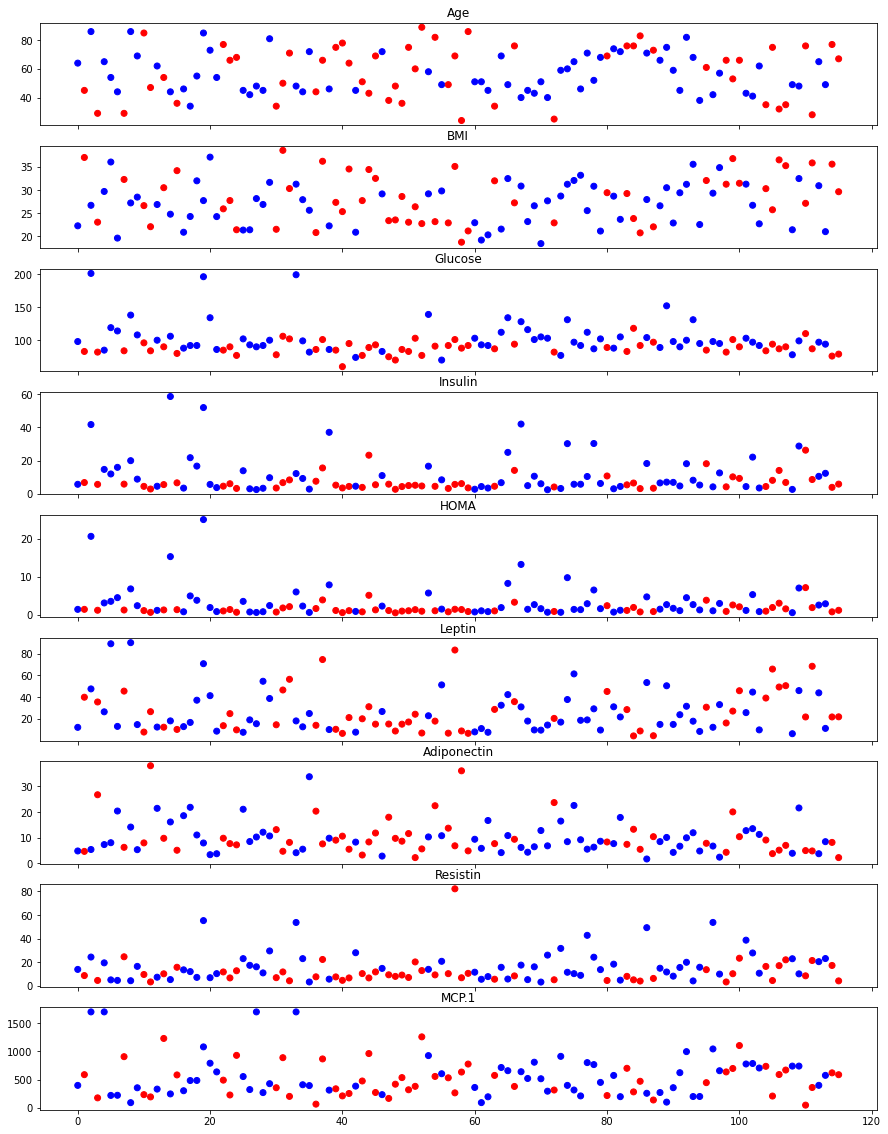

In [5]:
class_colors = ['red', 'blue']
one_features = dataFrame.drop(['Classification'], axis=1).columns

n_col = 1
n_row = one_features.__len__()

fig, axes = plt.subplots(
                        n_row,
                        n_col,
                        sharex=True,
                        figsize=(15 ,20),
                        tight_layout=False,
                        )

# shuffle data
temp_data = dataFrame.sample(frac=1).reset_index(drop=True)

for column, axis in zip(one_features, axes):
    axis.scatter(range(temp_data[column].__len__()), temp_data[column],
                   c=temp_data['Classification'],
                   cmap=ListedColormap(class_colors))
    axis.set_title(column)


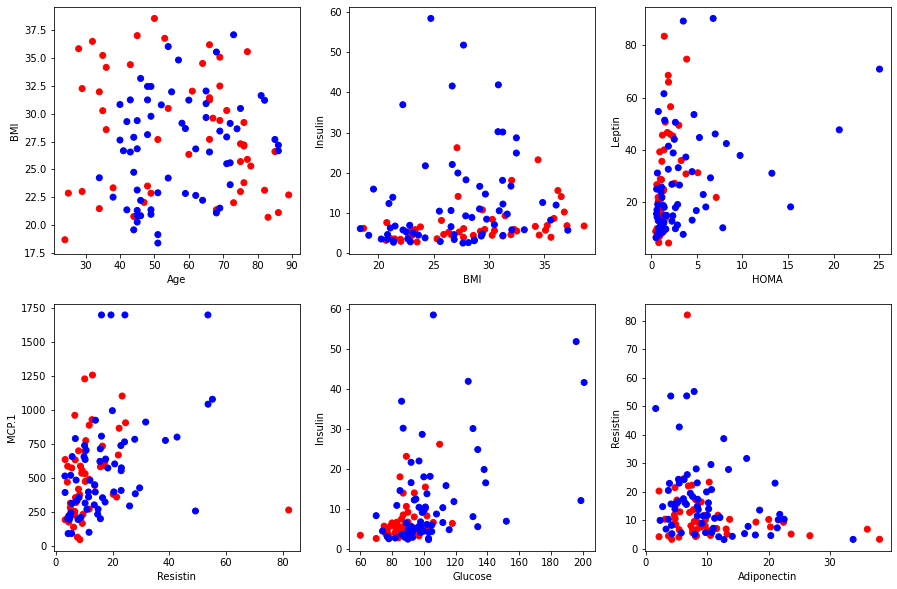

In [6]:


# [axisis 0, axis 1]
two_features = [
        ['Age', 'BMI'],
        ['BMI', 'Insulin'],
        ['HOMA', 'Leptin'],
        ['Resistin', 'MCP.1'],
        ['Glucose', 'Insulin'],
        ['Adiponectin', 'Resistin'],
          ]

n_row = 2
n_col = 3


fig, axes = plt.subplots(
                        n_row,
                        n_col,
                        figsize=(15 ,10),
                        tight_layout=False,
                        )
count = 0
for vertical_axes in axes:
    for axis in vertical_axes:
        # column names
        vertical = two_features[count][0]
        horizontal = two_features[count][1]

        axis.scatter(
                  dataFrame[vertical],
                  dataFrame[horizontal],
                  c=dataFrame['Classification'],
                  cmap=ListedColormap(class_colors),
                   )

        axis.set_xlabel(vertical)
        axis.set_ylabel(horizontal)

        count += 1

<h1>
با توجه به نمودار ها در میابیم که داده ها تداخل زیادی دارند و به صورت خطی تفکیک پذیر نیستند و استفاده از مدل های خطی نتیجه مطلوبی را به ما نمی دهد
</h1>

In [7]:
# check if has None value
dataFrame.isna().all().any()

False

In [8]:
# extracting x, y from data
y = dataFrame.Classification
data = dataFrame.drop(['Classification'], axis=1)
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [9]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x = scaler.fit_transform(data)
x[:5,:]

array([[-0.57979363, -0.81667527, -1.23922225, -0.72873938, -0.61428241,
        -0.93233407, -0.07022151, -0.54551749, -0.34125061],
       [ 1.60182096, -1.37875056, -0.25829943, -0.68803819, -0.54824045,
        -0.93041264, -0.69734988, -0.86421418, -0.1912238 ],
       [ 1.53948912, -0.89176446, -0.30288683, -0.55007314, -0.46475236,
        -0.45421914,  1.79799836, -0.4416602 ,  0.05821407],
       [ 0.66684328, -1.24330321, -0.92711044, -0.67696507, -0.57420965,
        -0.87602119, -0.44194467, -0.15886735,  1.14271758],
       [ 1.7888165 , -1.29460116, -0.25829943, -0.6447433 , -0.52108087,
        -1.04268238, -0.78688094, -0.33635201,  0.69471601]])

In [10]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

# k-fold cross_validation and training

n_splits=5

def train(model):
    cv = KFold(n_splits=n_splits, shuffle=True, )
    scores = cross_validate(
                        model,
                        x_train,
                        y_train,
                        cv=cv,
                        scoring='accuracy',
                        return_train_score=True,
                        )
    scores = scores['train_score'].mean()

    model.fit(x_train, y_train)
    return model, scores.mean()

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# finding best k value
k_range = (3, 11)
best=-1
for k in range(*k_range, 2):
    _, score = train(KNeighborsClassifier(n_neighbors=k))
    if(score>best):
        best = score
        best_k = k
    print("k = {} :".format(k), score)
print('\nbest k for knn model: ', best_k)

k = 3 : 0.7992307692307692
k = 5 : 0.8147115384615387
k = 7 : 0.7438942307692307
k = 9 : 0.7127884615384616

best k for knn model:  5


In [13]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# list of models
models = [LogisticRegression(),
          SVC(kernel='linear'),
          SVC(kernel='rbf'),
          DecisionTreeClassifier(),
          KNeighborsClassifier(n_neighbors=3)]

trained_models = []
for model in models:
    trained_model, score = train(model)
    print("%37s" % "{} :".format(model),score)
    trained_models.append(trained_model)

               LogisticRegression() : 0.7777403846153846
               SVC(kernel='linear') : 0.7715865384615384
                              SVC() : 0.8641346153846154
           DecisionTreeClassifier() : 1.0
KNeighborsClassifier(n_neighbors=3) : 0.8083653846153848


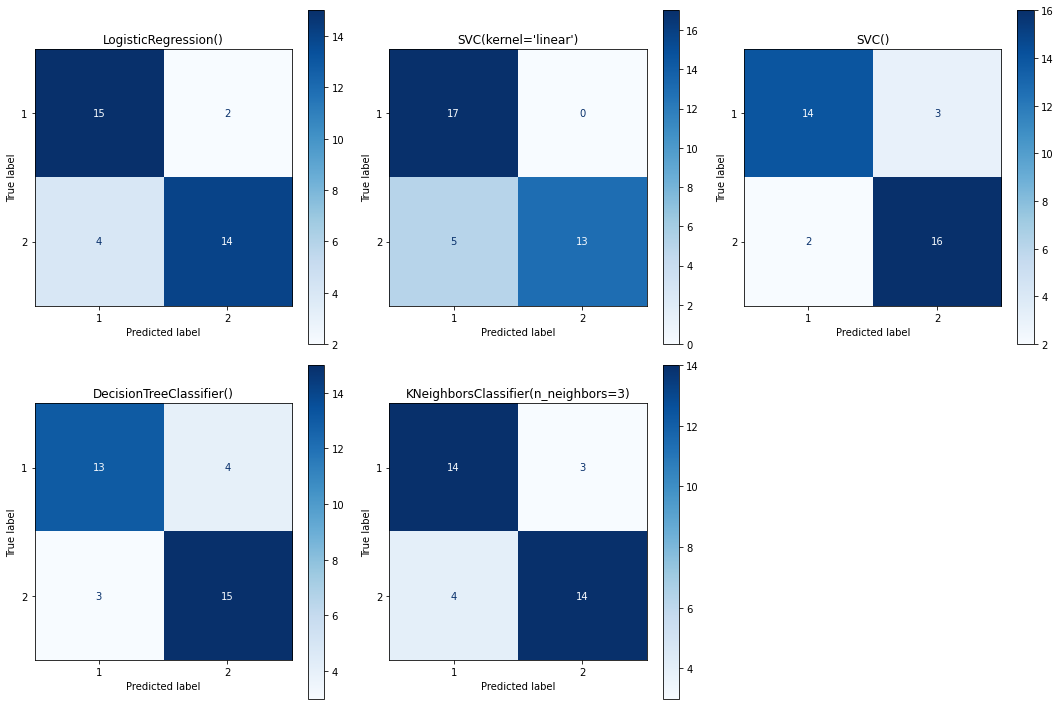

In [14]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt



fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for model, ax in zip(trained_models, axes.flatten()):
    plot_confusion_matrix(model,
                          x_test,
                          y_test,
                          ax=ax,
                          cmap='Blues',
                         )
    ax.title.set_text(model)
axes[-1][-1].set_visible(False)

plt.tight_layout()
plt.show()